# Analysis of Streaming Application  - Data Visualisation Project

This project focuses on a streaming application dataset that represents a collection of information related to how users interact with a streaming application. This data provides insights into user behavior, content consumption, and the overall performance of the streaming service.

The dataset was cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes. The dataset is provided by a user from Kaggle (https://www.kaggle.com/datasets/rajatkumar30/streaming-application-viewership). We will be using Python to analyze the dataset and a series of visualisations such as pandas, seaborn, matplotlib and SciPy libraries to answer the following questions:

1. Which genres are most popular among male and female?
2. Do males or females spend more time on the streaming application?
3. What age group has the most viewed time?
4. How does subscription type affect the playback quality?
5. Which language of content is the most popular in different countries?
6. Which devices are most popular among male and female audience?

### Import Libraries

In [4]:
import numpy as np
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from matplotlib import pyplot as plt 

stream_data = pd.read_csv('streaming_viewership_data.csv')

### Load and Inspect Data

In [5]:
print(stream_data.info())
stream_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_ID              6214 non-null   object 
 1   Session_ID           6214 non-null   object 
 2   Device_ID            6214 non-null   int64  
 3   Video_ID             6214 non-null   int64  
 4   Duration_Watched     6214 non-null   float64
 5   Genre                6214 non-null   object 
 6   Country              6214 non-null   object 
 7   Age                  6214 non-null   int64  
 8   Gender               6214 non-null   object 
 9   Subscription_Status  6214 non-null   object 
 10  Ratings              6214 non-null   int64  
 11  Languages            6214 non-null   object 
 12  Device_Type          6214 non-null   object 
 13  Location             6214 non-null   object 
 14  Playback_Quality     6214 non-null   object 
 15  Interaction_Events   6214 non-null   i

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched,Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
1,661d4b59-4328-410a-901c-1e3b4c40c334,3bc0a662-b353-4015-8b0c-55ceb510d13a,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22
2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41
3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,0441086d-c59e-478d-a496-5c5b995ecfdb,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40
4,338d3f91-5f1c-4590-8803-324901826406,0295f01d-7f15-4799-856c-90c688697ef8,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41


The dataset contains 6214 rows and 16 columns containing information on different attributes of an individual. Fortunately, none of the columns have null values.

Here's a quick summary of the columns:

- **User_ID**: A unique identifier for the user.
- **Session_ID**: A unique identifier for the user's session.
- **Device_ID**: An identifier for the user's device.
- **Video_ID**: An identifier for the video content being viewed.
- **Duration_Watched**: The amount of time (in minutes) the user spent watching the video.
- **Genre**: The genre of the video content (e.g., Action, Comedy, Drama, etc.).
- **Country**: The country where the interaction event took place.
- **Age**: The age of the user.
- **Gender**: The gender of the user (e.g., Male, Female).
- **Subscription_Status**: The user's subscription status (e.g., Free, Premium).
- **Ratings**: The user's rating or feedback for the content (typically on a scale from 1 to 5).
- **Comment**s: Any comments or feedback left by the user.
- **Languages**: The language of the content being viewed.
- **Device_Type**: The type of device used by the user (e.g., Smartphone, Tablet, etc.).
- **Location**: The location or city where the interaction event occurred.
- **Playback_Quality**: The quality of video playback (e.g., HD, SD, 4K).
- **Interaction_Events**: The count of interaction events that occurred during the user's session (e.g., clicks, likes, shares, etc.).

In [6]:
stream_data.describe(include = 'all')

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched,Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
count,6214,6214,6214.000000,6214.000000,6214.000000,6214,6214,6214.000000,6214,6214,6214.000000,6214,6214,6214,6214,6214.000000
unique,6214,6214,NaN,NaN,NaN,6,243,NaN,2,2,NaN,5,5,5169,3,NaN
top,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,NaN,NaN,NaN,Documentary,Congo,NaN,Female,Free,NaN,English,Smart TV,East Michael,4K,NaN
freq,1,1,NaN,NaN,NaN,1065,49,NaN,3148,3111,NaN,1313,1306,7,2092,NaN
mean,NaN,NaN,496.762150,50.323785,60.378389,NaN,NaN,39.665594,NaN,NaN,2.987448,NaN,NaN,NaN,NaN,50.776794
std,NaN,NaN,287.681163,28.671178,34.597273,NaN,NaN,17.571317,NaN,NaN,1.403304,NaN,NaN,NaN,NaN,29.009363
min,NaN,NaN,1.000000,1.000000,0.055809,NaN,NaN,10.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,248.000000,26.000000,30.413538,NaN,NaN,24.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,26.000000
50%,NaN,NaN,493.500000,50.000000,60.765637,NaN,NaN,40.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,51.000000
75%,NaN,NaN,742.000000,75.000000,90.874141,NaN,NaN,55.000000,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,76.000000


## Data Cleaning and Preparation

In [7]:
def clean_df_text(df):
    # clean the column name texts
    df.columns = df.columns.str.strip()

    # clean the row value texts
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].str.title()
            df[column] = df[column].str.strip()

    return df

In [8]:
stream = clean_df_text(stream_data)

## Data Question 1: Which genres are most popular among male and female?

In [49]:
# Initial genre counts
genre = stream.Genre.value_counts().rename_axis('Genre').reset_index(name='Count')
genre

,Genre,Count
0,Documentary,1065
1,Thriller,1050
2,Sci-Fi,1041
3,Comedy,1033
4,Action,1030
5,Drama,995


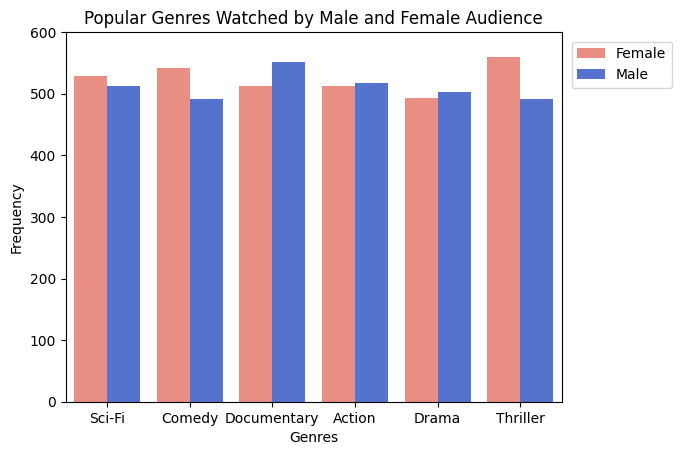

In [221]:
sns.countplot(data = stream_data, x = 'Genre', hue = 'Gender', palette = ['salmon','royalblue'])
plt.title('Popular Genres Watched by Male and Female Audience')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.ylim(0,600)
plt.legend(loc = (1.02,0.85))
plt.show()

The documentary genre is the most popular among the male audience with approximately 550 men. The action and sci-fi genre is the second and third most popular genre respectively for the male audience. For the female audience, the thriller genre is most popular with approximately 560 females, followed by the comedy and sci-Fi genre.

## Data Question 2: Do males or females spend more time on the streaming application?

In [87]:
gender_watchtime = stream_data.groupby('Gender').Duration_Watched.sum().reset_index()
gender_watchtime

,Gender,Duration_Watched
0,Female,190649.682587
1,Male,184541.623594


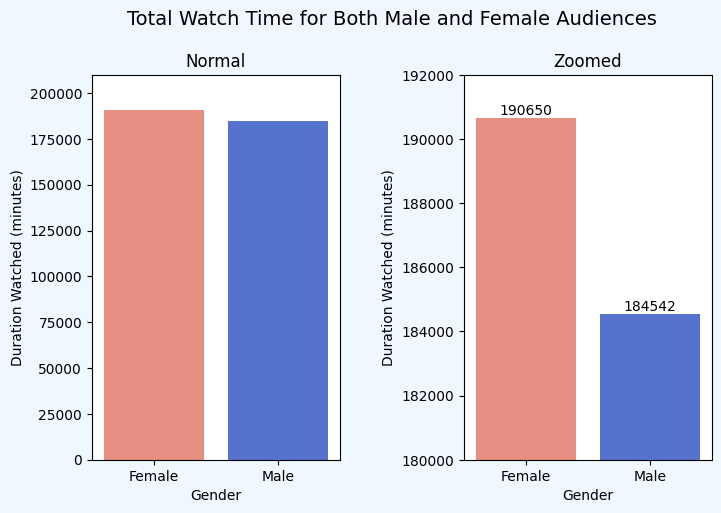

In [220]:
fig = plt.figure(facecolor = 'aliceblue', figsize = (8, 5))
fig.suptitle("Total Watch Time for Both Male and Female Audiences", fontsize = 14, y = 1.01)
plt.subplots_adjust(wspace=0.5,hspace=0.7)

plt.subplot(1,2,1)
sns.barplot(data = gender_watchtime, x = 'Gender', y = 'Duration_Watched', palette= ['salmon', 'royalblue'])
plt.title('Normal')
plt.ylabel('Duration Watched (minutes)')
plt.ylim(0, 210000)

plt.subplot(1,2,2)
nm = sns.barplot(data = gender_watchtime, x = 'Gender', y = 'Duration_Watched', palette= ['salmon', 'royalblue'])
nm.bar_label(nm.containers[0])
plt.title('Zoomed')
plt.ylabel('Duration Watched (minutes)')
plt.ylim(180000, 192000)
plt.show()

Female audience has a slightly higher total watch time than male audience with 190650 minutes and 184542 minutes respectively. 

 ## Data Question 3: What age group has the most viewed time?

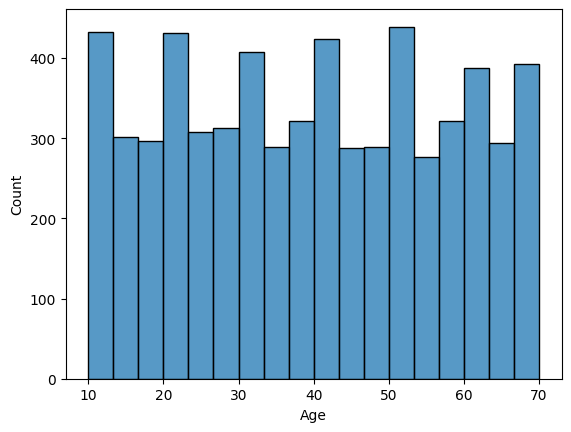

In [31]:
# Plotting histogram 
sns.histplot(data = stream, x = 'Age')
plt.show()

In [114]:
bins = [10,20,30,40,50,60,70]
stream_data['binned_age'] = pd.cut(stream_data.Age, bins, 
                                   labels = ['10 to 20', '20 to 30', '30 to 40', '40 to 50', '50 to 60', '60 to 70'])

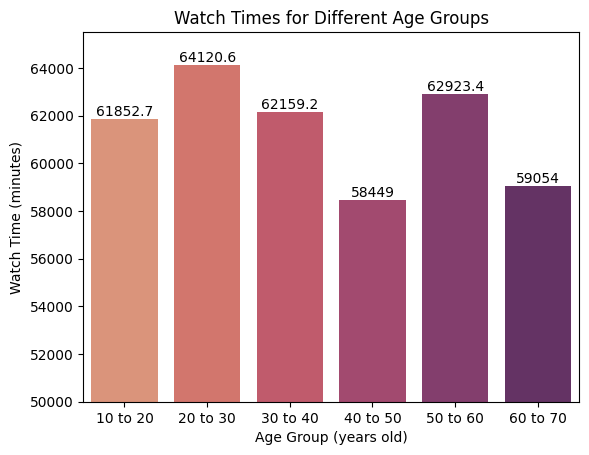

In [116]:
binned_age = stream_data.groupby('binned_age').Duration_Watched.sum().rename_axis('Age Group').reset_index(name = 'Frequency')
ax = sns.barplot(data = binned_age, x = 'Age Group', y = 'Frequency', 
           palette = sns.color_palette("flare"))
ax.bar_label(ax.containers[0])
plt.xlabel('Age Group (years old)')
plt.ylabel('Watch Time (minutes)')
plt.title('Watch Times for Different Age Groups')
plt.ylim(50000, 65500)
plt.show()

People between ages of 20 to 30 years old have the highest watch time with around 64000 minutes, followed by people between 50 to 60 years old with around 62000 minutes. The 40 to 50 age group and 60 to 70 age group have the lowest watch time with only around 58000 minutes of watch time. 

 ## Data Question 4: How does subscription type affect the playback quality?


In [175]:
# Initial language and playback count
subscription = stream.Subscription_Status.value_counts().rename_axis('Subscription').reset_index(name='Count')
playback = stream.Playback_Quality.value_counts().rename_axis('Quality').reset_index(name='Count')

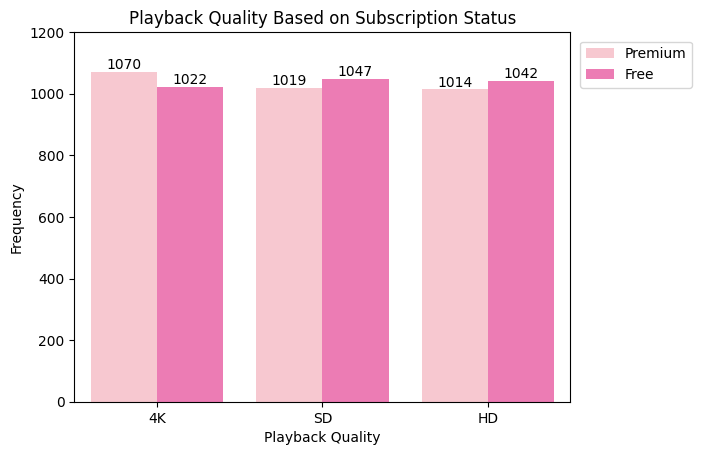

In [182]:
ax = sns.countplot(data = stream_data, x = 'Playback_Quality', hue = 'Subscription_Status', palette = ['pink', 'hotpink'],)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_xticklabels(["4K", "SD", 'HD'])
plt.title('Playback Quality Based on Subscription Status')
plt.xlabel('Playback Quality')
plt.ylabel('Frequency')
plt.ylim(0, 1200)
plt.legend(loc = (1.02,0.85))
plt.show()

Watchers with a premium subscription tend to watch in 4K whereas watchers with a free subscription are more likely to watch in SD. However, there are only minor differences among each playback quality. 

## Data Question 5: Which language of content is the most popular in different countries?

In [21]:
# Initial language count
languages = stream.Languages.value_counts().rename_axis('Languages').reset_index(name='Count')
languages

,Languages,Count
0,English,1313
1,Chinese,1264
2,German,1257
3,Spanish,1196
4,French,1184


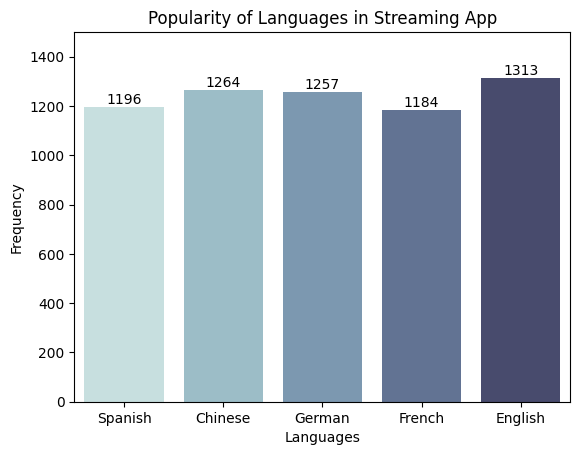

In [123]:
# Plotting pie chart for languages
ax = sns.countplot(data = stream_data, x = 'Languages',
        palette = sns.color_palette("ch:start=.2,rot=-.3"))
ax.bar_label(ax.containers[0])
plt.ylim(0, 1500)
plt.ylabel('Frequency')
plt.title('Popularity of Languages in Streaming App')
plt.show()

English content is by far the most popular among the others with 1313 people watching. Chinese and German content are the 2nd and 3rd most popular content respectively with Chinese content leading by small margin of approximately 1260 people and approximately 1255 people for German content.

In [183]:
# Initial country count
country = stream.Country.value_counts().rename_axis('Country').reset_index(name='Count')
country.head(10)

,Country,Count
0,Congo,49
1,Wallis And Futuna,42
2,Korea,42
3,Solomon Islands,41
4,Uganda,39
5,New Caledonia,38
6,Mongolia,36
7,Tokelau,36
8,Saint Lucia,35
9,Chad,35


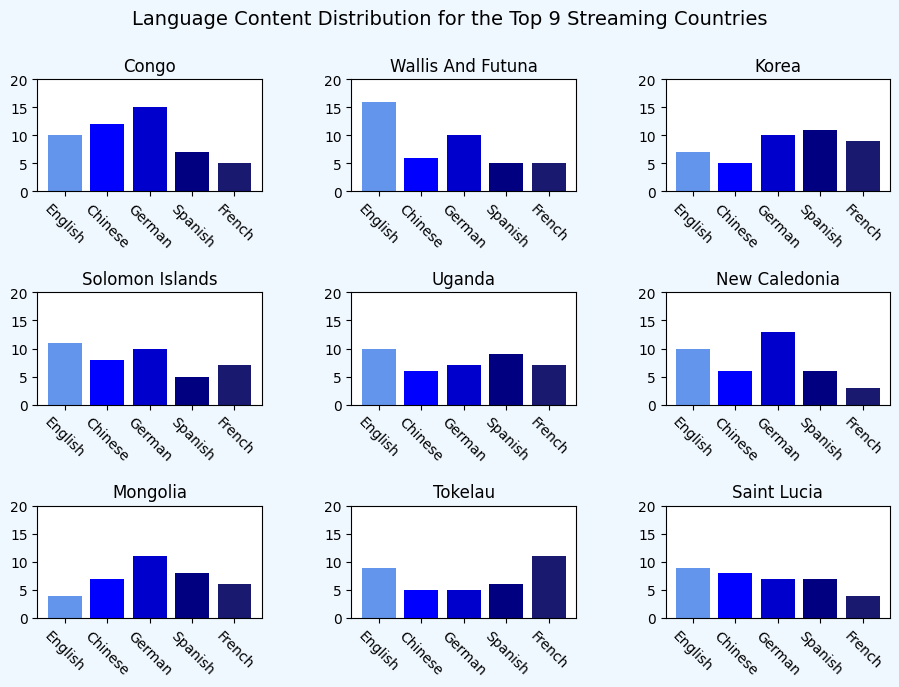

In [24]:
# Plotting bar charts 
country_list = []
count = 0
language_count = []
language_list = ['English', 'Chinese', 'German', 'Spanish', 'French']
index = 1

fig = plt.figure(facecolor = 'aliceblue', figsize = (11, 7))
fig.suptitle("Language Content Distribution for the Top 9 Streaming Countries", fontsize = 14)

for i in range(0,9):
    country_list.append(country.Country[i])
    
for n in country_list:
    for language in language_list:
        for m in range(0, len(stream)):
            if stream.Country[m] == n and stream.Languages[m] == language:
                count += 1
        language_count.append(count)
        count = 0
    plt.subplot(3,3,index)
    plt.subplots_adjust(wspace=0.4,hspace=0.9)
    plt.bar(x = language_list, height = language_count, color= ['cornflowerblue', 'blue', 'mediumblue', 
                                                                                       'navy', 'midnightblue'])
    plt.xticks(rotation = -45)
    plt.title(n)
    plt.ylim(0, 20)
    language_count = []
    index += 1
         
plt.show()

The graphs above shows the popularity of different languages in the top 9 highest streaming countries. The streaming app is most popular in Congo, followed by Wallis and Futuna, Korea  then Solomon Islands, so on and so forth. Since English content is the most streamed, it is no suprise that 4 out of 9 countries (Wallis and Futuna, Soloman Islands, Uganda and Tokelau) have English as their most streamed content. German content is also popular among these countries especially in Congo, New Caledonia and Mongolia, seeing that it is the most popular content.

## Data Question 6: Which devices are most popular among male and female audience?

In [25]:
# Inital device count
device = stream.Device_Type.value_counts().rename_axis('Devices').reset_index(name='Count')
device

,Devices,Count
0,Smart Tv,1306
1,Desktop,1270
2,Smartphone,1233
3,Tablet,1217
4,Laptop,1188


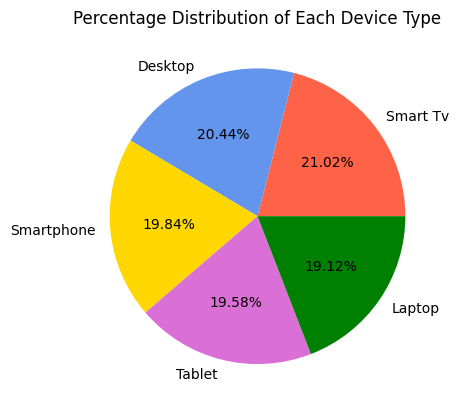

In [185]:
# Plotting pie chart for device types
plt.pie(x = device.Count, labels = device.Devices, colors = ['tomato', 'cornflowerblue', 'gold', 'orchid', 'green',], autopct='%1.2f%%')
plt.title('Percentage Distribution of Each Device Type')
plt.show()

The usage distribution of the device types are almost evenly distributed. Smart TV is only leading with a tiny percentage with 21.02% usage followed by desktop and smartphone with 20.44% and 19.84% respectively.

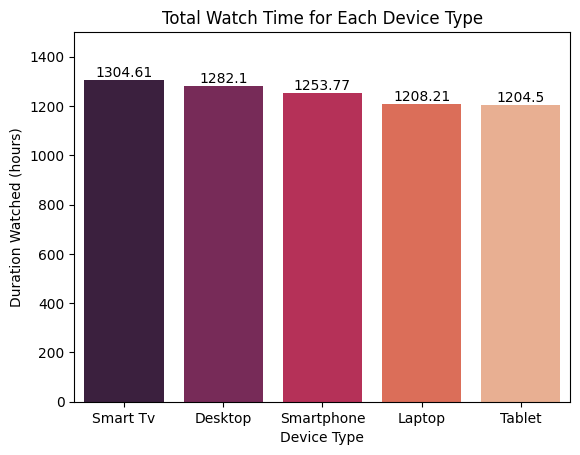

In [219]:
type_watched = stream_data.groupby('Device_Type').Duration_Watched.sum().sort_values(ascending = False).rename_axis('Device Type').reset_index()
type_watched
type_watched['Duration_Watched'] = type_watched['Duration_Watched']/60
ax = sns.barplot(data = type_watched, x = 'Device Type', y = 'Duration_Watched', palette= sns.color_palette("rocket", 5))
ax.bar_label(ax.containers[0])
plt.title('Total Watch Time for Each Device Type')
plt.ylabel('Duration Watched (hours)')
plt.ylim(0,1500)
plt.show()

Smart TV has the highest watch time with approximately 1305 hours. Next is desktop and smartphone with approximately 1280 hours and 1250 hours respectively. Even though laptops have a lower usage than tablets, laptops have a slightly higher watch time.

In [29]:
device_male = [0,0,0,0,0]
device_female = [0,0,0,0,0]
device_index = 0

for dev in device.Devices:
    for n in range(0, len(stream)):
        if stream.Device_Type[n] == dev and stream.Gender[n] == 'Male':
            device_male[device_index] += stream.Duration_Watched[n]/60
        elif stream.Device_Type[n] == dev and stream.Gender[n] == 'Female':
            device_female[device_index] += stream.Duration_Watched[n]/60
    device_index += 1

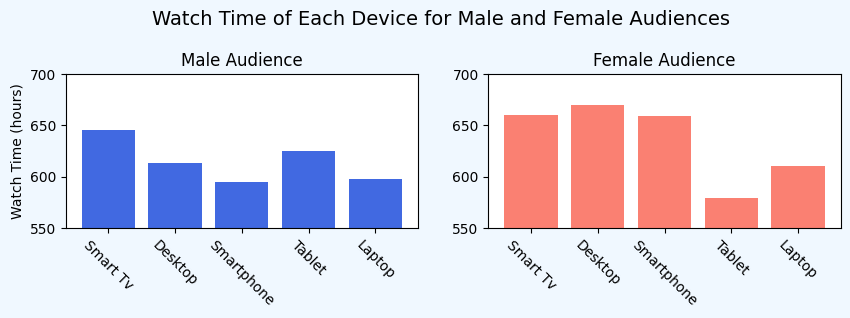

In [30]:
fig = plt.figure(figsize = (10,2), facecolor = 'aliceblue')
plt.suptitle('Watch Time of Each Device for Male and Female Audiences', y= 1.2, fontsize = 14)
plt.subplot(1,2,1)
plt.bar(x = device.Devices, height = device_male, color = 'royalblue')
plt.title('Male Audience', fontsize = 12)
plt.xticks(rotation = -45)
plt.ylabel('Watch Time (hours)')
plt.ylim(550, 700)

plt.subplot(1,2,2)
plt.bar(x = device.Devices, height = device_female, color = 'salmon')
plt.title('Female Audience', fontsize = 12)
plt.xticks(rotation = -45)
plt.ylim(550, 700)
plt.subplots_adjust(wspace=0.2,hspace=0.6)
plt.show()

For the male audience, videos are mostly streamed on Smart TV with approximately a total 645 hours, followed by on the tablet with 625 hours. For the female audience, the desktop is the most popular device to stream on with Smart TV as a close second . Smarthphones are the third most popular device for the female audience.

## Conclusion

The goal of this project was to gain an insight on the viewership of a video streaming application. After some exploration and analysis of the data, it was found that the app has a higher female audience than male audience by a small margin. The different genres also played a role in each gender where the 'Documentary' genre was seen to be more popular among men and 'Thriller' genre was popular among women. This analysis also found that people from ages 20 to 30 spend the most time on the streaming app. In addition, we found that people with a free subscriptions tend to watch videos in High Definition and people with a premium subscription are more likely to watch videos in 4K. Another finding was that English content is the most popular followed by Chinese and German content on the app and lastly, Smart TVs and desktops are the most popular device to stream videos for male and female audiences.